# SETTING UP A FILM STUDIO & GENERATING CONTENT

## INTRODUCTION

We as a company , in the pursuit of diversification, have commissioned setting up a movie studio in order to create original content and generate revenue for the company.The film industry is a good fit for our company strategy.It is therefore necessary to undertake a pre-entry business viability assessment as an important and effective management approach in the new enterprise.The analysis uses data from the global film industry between 2010 to 2019.

## BACKGROUND

According to Wikipidea ,the global film industry was worth over USD 42 billion in 2019 with the largest markets being the United States , Asia-pacific , the UK and Europe.
The industry comprises various film genres such as action,crime,animated,comedy,drama,fantasy,horror and documentary.
A film genre is defined as a stylistic or thematic category for motion pictures based on similarities either in the narrative elements, aesthetic approach, or the emotional response to the film.

## DATA OVERVIEW

The project uses 2010 to 2019 data from IMDb movies ratings and reviews mined from www.imdb.com website.The data comprises movie basics, movie ratings, genre, runtime, directors and writers among others.
The data is cleaned , analysed and the findings used to inform decision making.

## DESCRIPTION OF VARIABLES

**
*1.Genre- a style or category of a movie e.g. action, horror, comedy, drama e.t.c.
*2.Runtime- This is the lenght of the movie.
*3.Ratings- ranking of the movie in the box office.
*4.Region- The geographical area to be targeted.


## BUSINESS PROBLEM

Major companies are producing original video content and  the company wants to enter the film production industry by establishing a new movie studio. However, the company lacks filmmaking experience and therefore necessary to undertake this project to inform the decision to open a new studio.Therefore, the primary challenge is to overcome this lack of experience and create a successful movie studio that produces high-quality movies that appeal to a wide audience. The management will utilise the results and findings of this analysis to guide on the content to be produced by the new studio.

## OBJECTIVES

1.Explore film genres that are marketable to the company.
2.To determine the appropriate movie runtime.
3.Determine which region to target.


## METHODOLOGY

This project uses secondary data sourced from IMDb website.The project utilises EDA to generate insights and the data is analysed using python libraries.

## DATA ANALYSIS

In [1]:
# import libraries
import itertools
import numpy as np
import pandas as pd
from numbers import Number
import zipfile
import sqlite3
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#file to the imdb zip file
imdb_zip_path = "./im.db.zip"
#path to extracted imdb file
imdb_path = "./im.db"

#extract the SQLite database from the zipfile
with zipfile.ZipFile(imdb_zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(imdb_path))  
    
#create a connection
conn = sqlite3.connect(imdb_path)
#initialize a cursor
#cur = conn.cursor()

In [3]:
conn=sqlite3.connect('imdb_path')
conn

In [4]:
# Connect to the SQLite database
conn = sqlite3.connect(imdb_path)
cur = conn.cursor()

# Fetch all tables in the database
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
print("Tables in the database:", tables)



Tables in the database: [('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


## Understanding Data Structures

In [5]:
schema_query=pd.read_sql("""
                         SELECT *
                          FROM sqlite_master
                         where type='table'
                         """,conn)
schema_query

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [6]:
#query the movie_basics table
movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)
print(movie_basics.head())


print('the structure of the data',movie_basics.shape)


    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
the structure of the data (146144, 6)


In [7]:
#query the directors table
directors = pd.read_sql("SELECT * FROM directors", conn)
print(directors.head())

print('the structure of the data',directors.shape)

    movie_id  person_id
0  tt0285252  nm0899854
1  tt0462036  nm1940585
2  tt0835418  nm0151540
3  tt0835418  nm0151540
4  tt0878654  nm0089502
the structure of the data (291174, 2)


In [8]:
#query the movie_akas table
movie_akas = pd.read_sql("SELECT * FROM movie_akas", conn)
print(movie_akas.head())

print('the structure of the data',movie_akas.shape)

    movie_id  ordering                                    title region  \
0  tt0369610        10                            Джурасик свят     BG   
1  tt0369610        11                        Jurashikku warudo     JP   
2  tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3  tt0369610        13                  O Mundo dos Dinossauros     BR   
4  tt0369610        14                           Jurassic World     FR   

  language        types   attributes  is_original_title  
0       bg         None         None                0.0  
1     None  imdbDisplay         None                0.0  
2     None  imdbDisplay         None                0.0  
3     None         None  short title                0.0  
4     None  imdbDisplay         None                0.0  
the structure of the data (331703, 8)


In [9]:
#query the principals table
principals = pd.read_sql("SELECT * FROM principals", conn)
print(principals.head(5))

print('the structure of the data',principals.shape)

    movie_id  ordering  person_id  category       job        characters
0  tt0111414         1  nm0246005     actor      None       ["The Man"]
1  tt0111414         2  nm0398271  director      None              None
2  tt0111414         3  nm3739909  producer  producer              None
3  tt0323808        10  nm0059247    editor      None              None
4  tt0323808         1  nm3579312   actress      None  ["Beth Boothby"]
the structure of the data (1028186, 6)


In [10]:
#query the movie_ratings
movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
print(movie_ratings.head())

print('the structure of the data',principals.shape)

     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21
the structure of the data (1028186, 6)


In [11]:
#query the persons table
persons = pd.read_sql("SELECT * FROM persons", conn)
print(persons)

print('the structure of the data',persons.shape)


        person_id         primary_name  birth_year  death_year  \
0       nm0061671    Mary Ellen Bauder         NaN         NaN   
1       nm0061865         Joseph Bauer         NaN         NaN   
2       nm0062070           Bruce Baum         NaN         NaN   
3       nm0062195         Axel Baumann         NaN         NaN   
4       nm0062798          Pete Baxter         NaN         NaN   
...           ...                  ...         ...         ...   
606643  nm9990381         Susan Grobes         NaN         NaN   
606644  nm9990690          Joo Yeon So         NaN         NaN   
606645  nm9991320       Madeline Smith         NaN         NaN   
606646  nm9991786  Michelle Modigliani         NaN         NaN   
606647  nm9993380       Pegasus Envoyé         NaN         NaN   

                                      primary_profession  
0              miscellaneous,production_manager,producer  
1             composer,music_department,sound_department  
2                             

In [12]:
#Query the Writers table
writers = pd.read_sql("SELECT * FROM writers", conn)
print(writers.head())

print('the structure of the data',writers.shape)

    movie_id  person_id
0  tt0285252  nm0899854
1  tt0438973  nm0175726
2  tt0438973  nm1802864
3  tt0462036  nm1940585
4  tt0835418  nm0310087
the structure of the data (255873, 2)


In [13]:
#Query Known_for Table
known_for = pd.read_sql("SELECT * FROM known_for", conn)
print(known_for.head())

print('the structure of the data',known_for.shape)

   person_id   movie_id
0  nm0061671  tt0837562
1  nm0061671  tt2398241
2  nm0061671  tt0844471
3  nm0061671  tt0118553
4  nm0061865  tt0896534
the structure of the data (1638260, 2)


## Data Manipulation
#### Joining movie_basics with movie_rating and movie_akas to identify most rated movies

In [14]:
# join movie_basics with movie_akas
merged_df = pd.merge(movie_basics, movie_akas, on='movie_id', how='left')

#  join with movie_ratings
merged_df = pd.merge(merged_df, movie_ratings, on='movie_id', how='left')

# Drop duplicates based on movie_id column to ensure uniqueness
merged_df = merged_df.drop_duplicates(subset=['movie_id'])

# Display the merged DataFrame
merged_df.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",1.0,Sangharsh,IN,hi,None,alternative transliteration,0.0,7.0,77.0
5,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",1.0,One Day Before the Rainy Season,XWW,en,None,None,0.0,7.2,43.0
9,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,10.0,La otra cara del viento,VE,None,None,None,0.0,6.9,4517.0
22,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",1.0,Subse Bada Sukh,IN,bn,None,None,0.0,6.1,13.0
25,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",1.0,La Telenovela Errante,None,None,original,None,1.0,6.5,119.0


## Checking the Null data in all columns

In [15]:
# Check for null data in all columns
null_data = merged_df.isnull().sum()

# Print columns with their respective null count
print("Null values in each column:")
print(null_data)

Null values in each column:
movie_id                  0
primary_title             0
original_title           21
start_year                0
runtime_minutes       31739
genres                 5408
ordering              23842
title                 23842
region                38655
language             138974
types                116983
attributes           143530
is_original_title     23856
averagerating         72288
numvotes              72288
dtype: int64


## Drop columns that are not required

In [16]:
# list   of columns that are not to be used
columns_to_drop = ['language','types','attributes','ordering']

# Drop the columns
merged_df = merged_df.drop(columns=columns_to_drop)

# confirm the changes
#print("DataFrame after dropping unnecessary columns:")
#merged_df.columns
merged_df.head()

#print('the structure of the data',merged_df.shape)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,region,is_original_title,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sangharsh,IN,0.0,7.0,77.0
5,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season,XWW,0.0,7.2,43.0
9,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,La otra cara del viento,VE,0.0,6.9,4517.0
22,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Subse Bada Sukh,IN,0.0,6.1,13.0
25,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",La Telenovela Errante,None,1.0,6.5,119.0


In [17]:
# Check for null data in all columns
null_data = merged_df.isnull().sum()

# Print columns with their respective null count
print("Null values in each column:")
print(null_data)

Null values in each column:
movie_id                 0
primary_title            0
original_title          21
start_year               0
runtime_minutes      31739
genres                5408
title                23842
region               38655
is_original_title    23856
averagerating        72288
numvotes             72288
dtype: int64


## Replace Missing values in the title column with values from 'Primary_title Column

In [18]:
# Replace missing values in 'title' and Original_title columns with values from 'primary_title' column
merged_df['title'] = merged_df['title'].fillna(merged_df['primary_title'])
merged_df['original_title'] = merged_df['original_title'].fillna(merged_df['primary_title'])

# Display the updated DataFrame
print(merged_df.head())

     movie_id                    primary_title              original_title  \
0   tt0063540                        Sunghursh                   Sunghursh   
5   tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
9   tt0069049       The Other Side of the Wind  The Other Side of the Wind   
22  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
25  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

    start_year  runtime_minutes                genres  \
0         2013            175.0    Action,Crime,Drama   
5         2019            114.0       Biography,Drama   
9         2018            122.0                 Drama   
22        2018              NaN          Comedy,Drama   
25        2017             80.0  Comedy,Drama,Fantasy   

                              title region  is_original_title  averagerating  \
0                         Sangharsh     IN                0.0            7.0   
5   One Day Before the Rainy

## Calculate the central tendency measures (Mean & Mode) to fill the missing values

In [19]:
# Fill missing values in each  column with the mean of the column
merged_df['runtime_minutes'] = merged_df['runtime_minutes'].fillna(merged_df['runtime_minutes'].mean())
merged_df['is_original_title'] = merged_df['is_original_title'].fillna(merged_df['is_original_title'].mean())
merged_df['averagerating'] = merged_df['averagerating'].fillna(merged_df['averagerating'].mean())
#merged_df['numvotes'] = merged_df['numvotes'].fillna(merged_df['numvotes'].mean())
merged_df['numvotes'] = merged_df['numvotes'].fillna(0)
merged_df['genres'] = merged_df['genres'].fillna(merged_df['genres'].mode()[0])
merged_df['region'] = merged_df['region'].fillna(merged_df['region'].mode()[0])

# Display the updated DataFrame
print(merged_df.columns)
merged_df.shape

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'title', 'region', 'is_original_title',
       'averagerating', 'numvotes'],
      dtype='object')


(146144, 11)

In [20]:
# Check for null data in all columns
null_data = merged_df.isnull().sum()

# Print columns with their respective null count
print("Null values in each column:")
print(null_data)

Null values in each column:
movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
title                0
region               0
is_original_title    0
averagerating        0
numvotes             0
dtype: int64


## Check for Duplicates and drop them

In [21]:
 #Check for any duplicate rows across all columns
duplicates = merged_df[merged_df.duplicated()]
print(f"Number of duplicate rows (all columns): {len(duplicates)}")

Number of duplicate rows (all columns): 0


## The structure of the data

In [22]:
merged_df.head(8)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,region,is_original_title,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",Sangharsh,IN,0.0,7.000000,77.0
5,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",One Day Before the Rainy Season,XWW,0.0,7.200000,43.0
9,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,La otra cara del viento,VE,0.0,6.900000,4517.0
22,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",Subse Bada Sukh,IN,0.0,6.100000,13.0
25,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",La Telenovela Errante,US,1.0,6.500000,119.0
30,tt0111414,A Thin Life,A Thin Life,2018,75.000000,Comedy,A Thin Life,AU,0.0,6.332729,0.0
31,tt0112502,Bigfoot,Bigfoot,2017,86.187247,"Horror,Thriller",Bigfoot,US,0.0,4.100000,32.0
32,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.000000,"Adventure,Animation,Comedy",Joe Finds Grace,CA,0.0,8.100000,263.0


In [23]:
merged_df.shape
print(f'The data has the following rows and columns: {merged_df.shape}')


The data has the following rows and columns: (146144, 11)


### Data analysis

### Analysis of the genre to identify the high rated and  most popular genres

## Genre by count

genres
Documentary     37593
Drama           21486
Comedy           9177
Horror           4372
Comedy,Drama     3519
dtype: int64


C:\Users\Kim\AppData\Local\Temp\ipykernel_10436\1037614519.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.index, y=genre_count.values, palette='viridis')


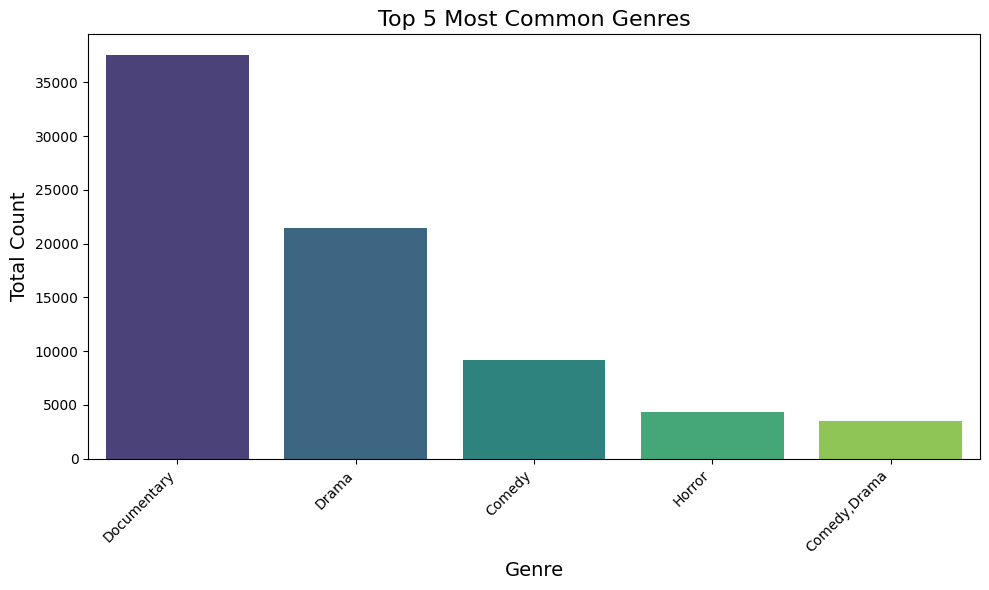

In [24]:
## Total Count  of each genre to identify the most common genres
def count_entries_by_genre(merged_df):
    # Count the total number of occurrences for each genre
    genre_counts = merged_df.groupby('genres').size().sort_values(ascending=False)
    return genre_counts
genre_count = count_entries_by_genre(merged_df).head()
print(genre_count)

# visualize the top 5 genres by count
def plot_genre_counts(genre_count):
    # Set up the plot
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot of genre counts
    sns.barplot(x=genre_count.index, y=genre_count.values, palette='viridis')
    
    # Add labels and title
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('Total Count', fontsize=14)
    plt.title('Top 5 Most Common Genres', fontsize=16)
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

plot_genre_counts(genre_count)

## The High rated Genres

genres
Music,Mystery                  9.0
Documentary,News,Reality-TV    8.8
Comedy,Drama,Reality-TV        8.8
Action,Adventure,Musical       8.7
Adventure,Crime                8.5
Name: averagerating, dtype: float64


C:\Users\Kim\AppData\Local\Temp\ipykernel_10436\4289076364.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_avg_rating.index, y=top_avg_rating.values, palette='coolwarm')


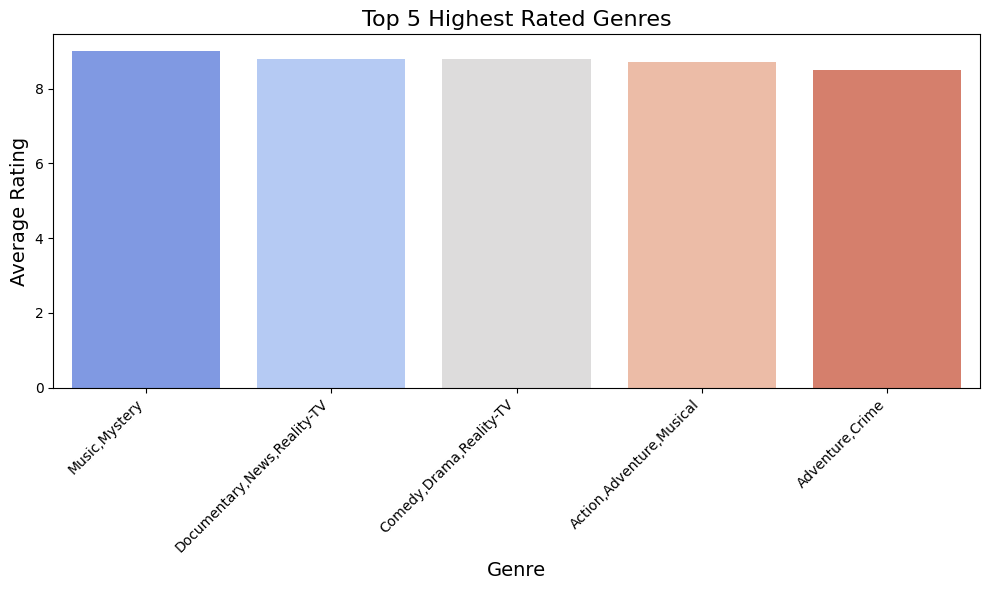

In [25]:
# Average rating of each Genre to identify which Genre is highly rated
def avg_rating_by_genre(merged_df):
    return merged_df.groupby('genres')['averagerating'].mean().sort_values(ascending=False).round(2)
print(avg_rating_by_genre(merged_df).head())

# Get the top 5 highest-rated genres
top_avg_rating = avg_rating_by_genre(merged_df).head()

# Plotting the average ratings of the top genres
def plot_avg_rating_by_genre(top_avg_rating):
    # Set up the plot
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot of average ratings
    sns.barplot(x=top_avg_rating.index, y=top_avg_rating.values, palette='coolwarm')
    
    # Add labels and title
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('Average Rating', fontsize=14)
    plt.title('Top 5 Highest Rated Genres', fontsize=16)
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

plot_avg_rating_by_genre(top_avg_rating)

## Popular Genre as per the number of Votes

genres
Action,Adventure,Sci-Fi      23,023,248
Action,Adventure,Fantasy      9,658,883
Adventure,Animation,Comedy    8,687,435
Drama                         8,395,521
Comedy,Drama,Romance          7,665,463
Name: numvotes, dtype: float64


C:\Users\Kim\AppData\Local\Temp\ipykernel_10436\1208472189.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_votes_by_genre.index, y=top_votes_by_genre.values, palette='coolwarm')


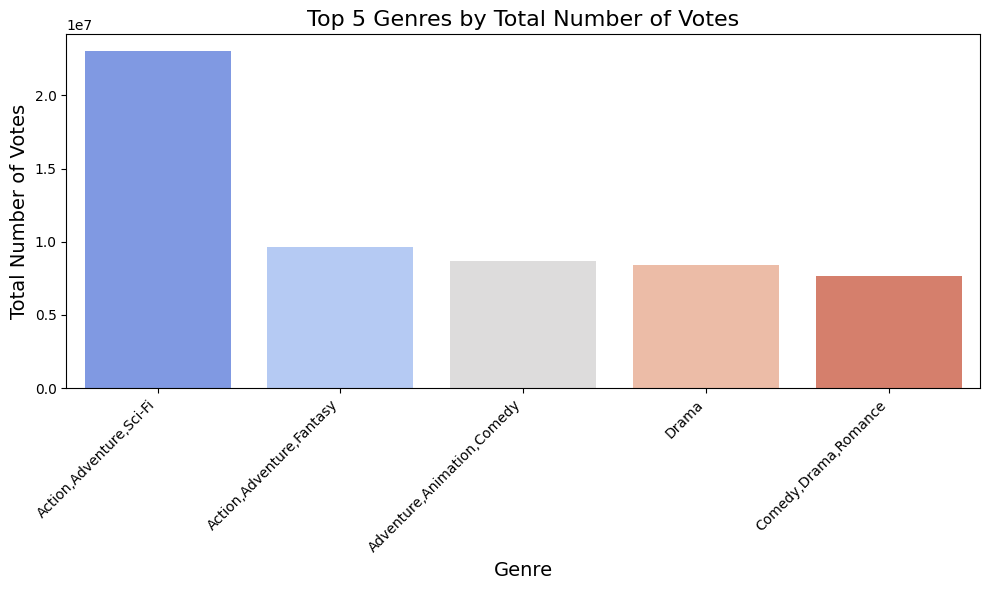

In [26]:
#Group the dataframe by genres and sum numvotes to identify the popular genres by number of votes
def sum_votes_by_genre(merged_df):
    return merged_df.groupby('genres')['numvotes'].sum().sort_values(ascending=False)
pd.set_option('display.float_format', '{:,.0f}'.format)

print(sum_votes_by_genre(merged_df).head(5))

# Get the top 5 genres with the most votes
top_votes_by_genre = sum_votes_by_genre(merged_df).head(5)

# Plotting the total votes of the top genres
def plot_votes_by_genre(top_votes_by_genre):
    # Set up the plot
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot of total votes by genre
    sns.barplot(x=top_votes_by_genre.index, y=top_votes_by_genre.values, palette='coolwarm')
    
    # Add labels and title
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('Total Number of Votes', fontsize=14)
    plt.title('Top 5 Genres by Total Number of Votes', fontsize=16)
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

plot_votes_by_genre(top_votes_by_genre)

## Count of Specific Genre

In [27]:
def count_entries_by_genre(merged_df, genre_name=None):
    # Count the total number of occurrences for each genre and sort in descending order
    genre_counts = merged_df.groupby('genres').size().sort_values(ascending=False)
    
    # If a specific genre is provided, return the count for that genre
    if genre_name:
        return genre_counts.get(genre_name, 0)  
    
    return genre_counts  


genre_name = 'Action,Adventure,Sci-Fi'  
genre_count = count_entries_by_genre(merged_df, genre_name)

# Print the count for the specific genre
print(f"Count for '{genre_name}' genre: {genre_count}")

# To print all genre counts sorted by occurrence:
genre_counts_all = count_entries_by_genre(merged_df).head(5)
print("All genre counts (sorted):")
print(genre_counts_all)

Count for 'Action,Adventure,Sci-Fi' genre: 152
All genre counts (sorted):
genres
Documentary     37593
Drama           21486
Comedy           9177
Horror           4372
Comedy,Drama     3519
dtype: int64


## Count and average rating for each genre

                       count  average_rating
genres                                      
Documentary            37593               7
Drama                  21486               6
Comedy                  9177               6
Horror                  4372               5
Comedy,Drama            3519               6
Thriller                3046               6
Action                  2219               6
Biography,Documentary   2115               7
Drama,Romance           2079               6
Comedy,Drama,Romance    1558               6


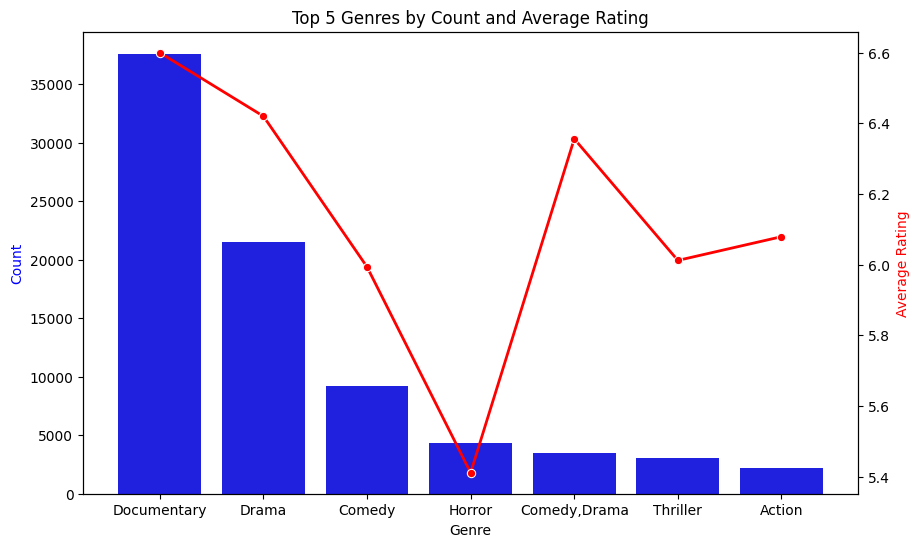

In [28]:
def genre_count_and_avg_rating(merged_df):
    # Count the total number of occurrences for each genre
    genre_counts = merged_df.groupby('genres').size()
    
    # Calculate the average rating for each genre
    genre_avg_ratings = merged_df.groupby('genres')['averagerating'].mean()
    
    # Merge the count and average rating into a single DataFrame
    genre_stats = pd.DataFrame({
        'count': genre_counts,
        'average_rating': genre_avg_ratings
    })
    
    # Sort by both 'count' and 'average_rating', first by count descending, then by average_rating descending
    genre_stats_sorted = genre_stats.sort_values(by=['count', 'average_rating'], ascending=[False, False])
    
    return genre_stats_sorted


genre_stats = genre_count_and_avg_rating(merged_df).head(10)

# Print the top genres based on the count and average rating
print(genre_stats)


def plot_top_5_genres(merged_df):
    # Get the genre count and average rating
    genre_stats = genre_count_and_avg_rating(merged_df)
    
    # Extract the top 5 genres
    top_5_genres = genre_stats.head(7)
    
    # Create a figure and axis object
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot the count on the first axis
    sns.barplot(x=top_5_genres.index, y=top_5_genres['count'], ax=ax1, color='b')
    ax1.set_ylabel('Count', color='b')
    ax1.set_xlabel('Genre')
    ax1.set_title('Top 5 Genres by Count and Average Rating')

    # Create a second axis for the average rating
    ax2 = ax1.twinx()
    sns.lineplot(x=top_5_genres.index, y=top_5_genres['average_rating'], ax=ax2, marker='o', color='r', linewidth=2)
    ax2.set_ylabel('Average Rating', color='r')

    # Show the plot
    plt.show()


plot_top_5_genres(merged_df)


## Analysis of most popular Genres (Documentary, Drama and Comedy) in the Regions Vs average ratings

## Regions where Documentary (Most popular and high rated genre) is preffered

In [29]:
def regions_that_prefer_drama_by_count(merged_df):
    # Group by 'region' and 'genres' to get the count of each genre in each region
    genre_region_counts = merged_df.groupby(['region', 'genres']).size().reset_index(name='count')
    
    # Sort by 'region' and 'count' within each region in descending order
    genre_region_counts_sorted = genre_region_counts.sort_values(by=['region', 'count'], ascending=[True, False])
    
    # For each region, get the genre with the highest count
    most_preferred_genre = genre_region_counts_sorted.groupby('region').first().reset_index()
    
    # Filter for regions where 'Drama' is the most preferred genre
    Documentary_preferred_regions = most_preferred_genre[most_preferred_genre['genres'] == 'Documentary']
    
    # Sort by count in descending order (overall top count first)
    Documentary_preferred_regions_sorted = Documentary_preferred_regions.sort_values(by='count', ascending=False)

    
    return Documentary_preferred_regions_sorted

Documentary_regions_count = regions_that_prefer_drama_by_count(merged_df).head()
print(Documentary_regions_count)


    region       genres  count
189     US  Documentary  19897
65      FR  Documentary   1758
67      GB  Documentary   1435
50      DE  Documentary   1326
34      CA  Documentary   1189


C:\Users\Kim\AppData\Local\Temp\ipykernel_10436\38862747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Documentary_regions_count, x='region', y='count', palette='Paired')


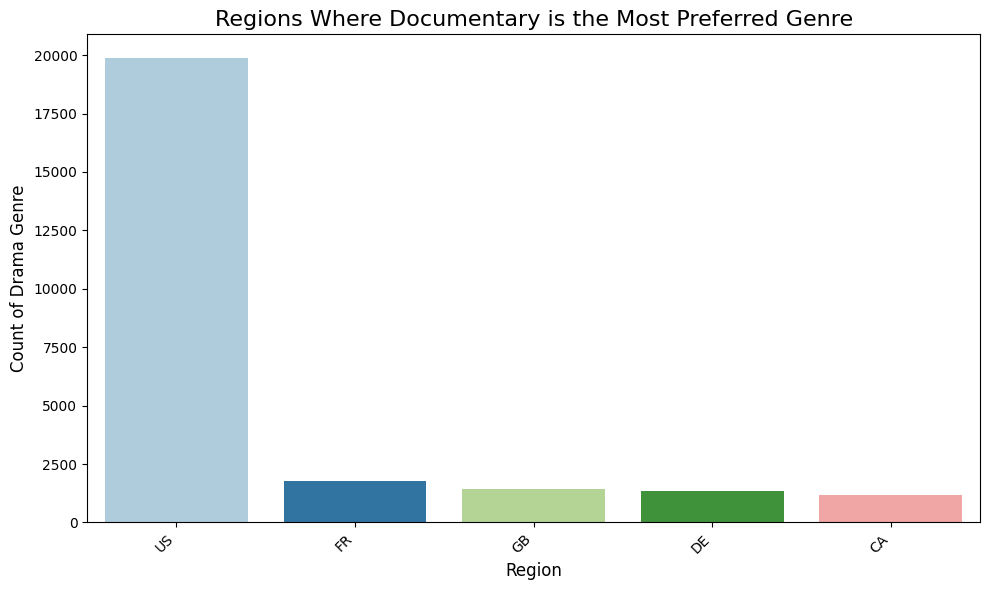

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Documentary_regions_count, x='region', y='count', palette='Paired')

# Customize plot
plt.title('Regions Where Documentary is the Most Preferred Genre', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count of Drama Genre', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

## Regions where Drama (2nd Most popular and high rated genre) is preffered

In [31]:
def regions_that_prefer_drama_by_count(merged_df):
    # Group by 'region' and 'genres' to get the count of each genre in each region
    genre_region_counts = merged_df.groupby(['region', 'genres']).size().reset_index(name='count')
    
    # Sort by 'region' and 'count' within each region in descending order
    genre_region_counts_sorted = genre_region_counts.sort_values(by=['region', 'count'], ascending=[True, False])
    
    # For each region, get the genre with the highest count
    most_preferred_genre = genre_region_counts_sorted.groupby('region').first().reset_index()
    
    # Filter for regions where 'Drama' is the most preferred genre
    drama_preferred_regions = most_preferred_genre[most_preferred_genre['genres'] == 'Drama']
    
    # Sort by count in descending order (overall top count first)
    drama_preferred_regions_sorted = drama_preferred_regions.sort_values(by='count', ascending=False)
    
    return drama_preferred_regions_sorted

# Example usage:
drama_regions_count = regions_that_prefer_drama_by_count(merged_df).head()
print(drama_regions_count)


    region genres  count
86      IN  Drama   1302
201    XWW  Drama    954
147     PH  Drama    345
158     RU  Drama    322
183     TR  Drama    205


C:\Users\Kim\AppData\Local\Temp\ipykernel_10436\2409229556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=drama_regions_count, x='region', y='count', palette='coolwarm')


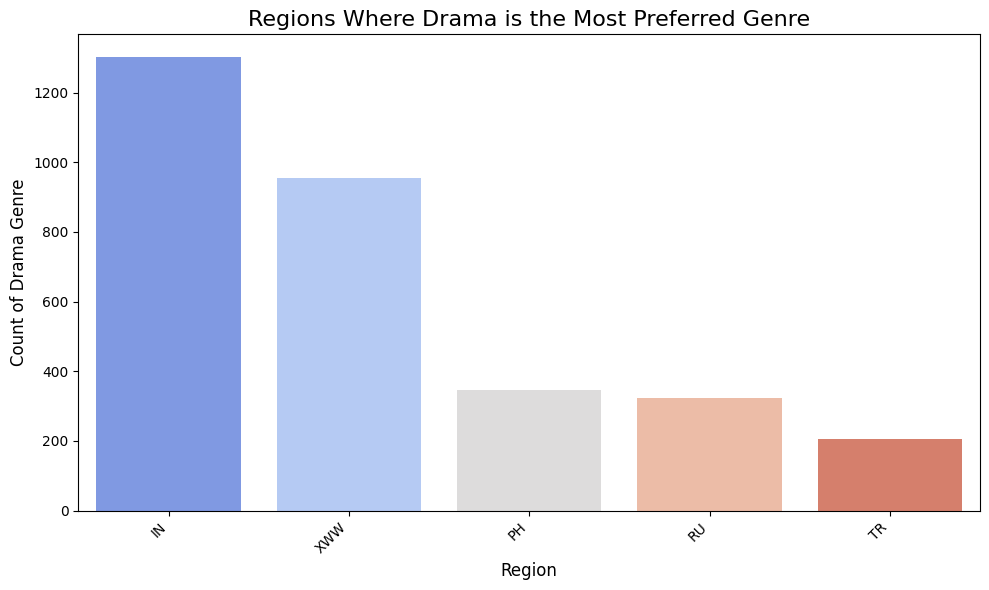

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=drama_regions_count, x='region', y='count', palette='coolwarm')

# Customize plot
plt.title('Regions Where Drama is the Most Preferred Genre', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count of Drama Genre', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

## Regions where Comedy ( 3rd Most popular and high rated genre) is preffered

In [33]:
def regions_that_prefer_comedy_by_count(merged_df):
    # Group by 'region' and 'genres' to get the count of each genre in each region
    genre_region_counts = merged_df.groupby(['region', 'genres']).size().reset_index(name='count')
    
    # Sort by 'region' and 'count' within each region in descending order
    genre_region_counts_sorted = genre_region_counts.sort_values(by=['region', 'count'], ascending=[True, False])
    
    # For each region, get the genre with the highest count
    most_preferred_genre = genre_region_counts_sorted.groupby('region').first().reset_index()
    
    # Filter for regions where 'Comedy' is the most preferred genre
    comedy_preferred_regions = most_preferred_genre[most_preferred_genre['genres'] == 'Comedy']
    
    # Sort by count in descending order (overall top count first)
    comedy_preferred_regions_sorted = comedy_preferred_regions.sort_values(by='count', ascending=False)

    return comedy_preferred_regions_sorted


comedy_regions_count = regions_that_prefer_comedy_by_count(merged_df).head()
print(comedy_regions_count)


    region  genres  count
132     MY  Comedy     66
177     TH  Comedy     50
53      DO  Comedy     31
74      GT  Comedy      7
100     KW  Comedy      5


C:\Users\Kim\AppData\Local\Temp\ipykernel_10436\19076601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comedy_regions_count, x='region', y='count', palette='Blues_d')


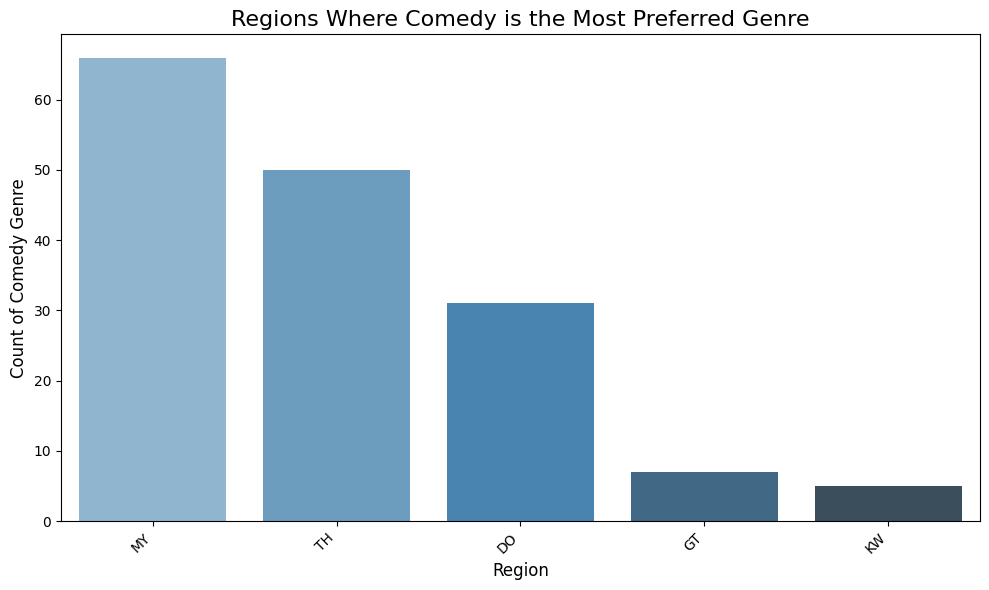

In [34]:
# Visualization
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(data=comedy_regions_count, x='region', y='count', palette='Blues_d')

# Customize plot
plt.title('Regions Where Comedy is the Most Preferred Genre', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count of Comedy Genre', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure everything fits nicely

# Show plot
plt.show()

## Analysis of runtime of each genre and average ratings

In [35]:
#Group by 'genres' and calculate the average runtime for each genre
def genre_avg_runtime(merged_df):
    genre_runtime = merged_df.groupby('genres')['runtime_minutes'].mean().reset_index()
    
    # Sort by average runtime in descending order to see the genres with highest runtime
    genre_runtime_sorted = genre_runtime.sort_values(by='runtime_minutes', ascending=False).reset_index(drop=True)
    
    return genre_runtime_sorted

print(genre_avg_runtime(merged_df))


                            genres  runtime_minutes
0         Biography,Mystery,Sci-Fi              220
1                    Drama,Western              206
2          History,Musical,Romance              174
3         Musical,Romance,Thriller              165
4        Adventure,Animation,Crime              157
...                            ...              ...
1080  Animation,Documentary,Sci-Fi               10
1081   Documentary,Mystery,Romance                7
1082            Drama,Horror,Short                7
1083  Animation,Documentary,Horror                4
1084                  Comedy,Short                1

[1085 rows x 2 columns]


## Runtime in Minutes of the most common Genres 

In [36]:
#Group by 'Documentary, Drama and Comedy and calculate the average runtime for each genre
def documentary_avg_runtime(merged_df):
    # Filter the dataset for rows where the genre is 'Documentary'
    documentary_df = merged_df[merged_df['genres'] == 'Documentary']
    
    # Calculate the average runtime for the Documentary genre
    avg_runtime_documentary = documentary_df['runtime_minutes'].mean()
    
    return avg_runtime_documentary




avg_runtime_doc = documentary_avg_runtime(merged_df)
print(f"Average runtime for Documentary: {avg_runtime_doc} minutes")

def drama_avg_runtime(merged_df):
    # Filter the dataset for rows where the genre is 'Drama'
    drama_df = merged_df[merged_df['genres'] == 'Drama']
    
    # Calculate the average runtime for the Drama genre
    avg_runtime_drama = drama_df['runtime_minutes'].mean()
    
    return avg_runtime_drama
avg_runtime_doc = drama_avg_runtime(merged_df)
print(f"Average runtime for drama: {avg_runtime_doc} minutes")





def comedy_avg_runtime(merged_df):
    # Filter the dataset for rows where the genre is 'Comedy'
    comedy_df = merged_df[merged_df['genres'] == 'Comedy']
    
    # Calculate the average runtime for the Comedy genre
    avg_runtime_comedy = comedy_df['runtime_minutes'].mean()
    
    return avg_runtime_comedy

avg_runtime_doc = comedy_avg_runtime(merged_df)
print(f"Average runtime for comedy: {avg_runtime_doc} minutes")


Average runtime for Documentary: 78.39884336598307 minutes
Average runtime for drama: 92.5602127114275 minutes
Average runtime for comedy: 91.1470579575322 minutes


C:\Users\Kim\AppData\Local\Temp\ipykernel_10436\354950107.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Average Runtime', data=runtime_data, palette='Blues_d')


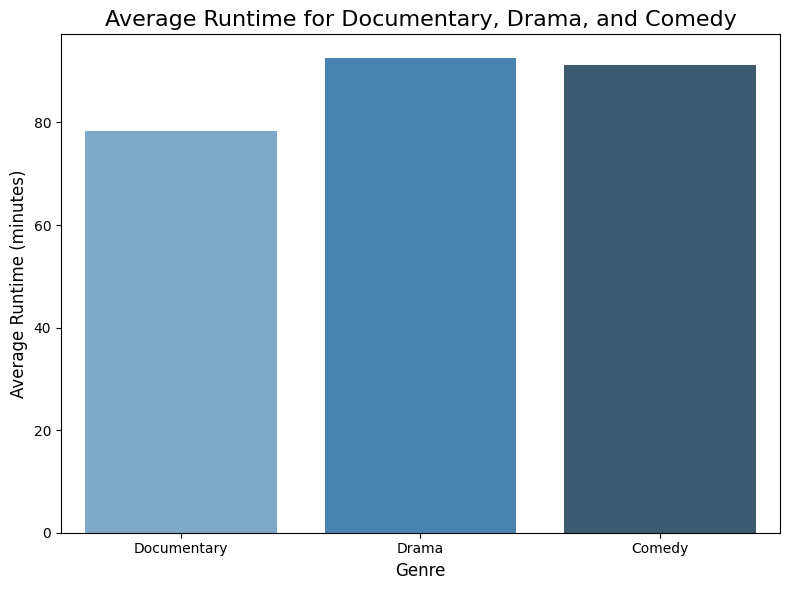

In [37]:
def plot_avg_runtime_for_genres(merged_df):
    # Calculate the average runtime for each genre
    avg_runtime_doc = documentary_avg_runtime(merged_df)
    avg_runtime_drama = drama_avg_runtime(merged_df)
    avg_runtime_comedy = comedy_avg_runtime(merged_df)
    
    # Prepare the data for plotting
    genres = ['Documentary', 'Drama', 'Comedy']
    avg_runtimes = [avg_runtime_doc, avg_runtime_drama, avg_runtime_comedy]

    # Create a DataFrame for plotting
    runtime_data = pd.DataFrame({
        'Genre': genres,
        'Average Runtime': avg_runtimes
    })

    # Create the bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x='Genre', y='Average Runtime', data=runtime_data, palette='Blues_d')

    # Customize plot
    plt.title('Average Runtime for Documentary, Drama, and Comedy', fontsize=16)
    plt.xlabel('Genre', fontsize=12)
    plt.ylabel('Average Runtime (minutes)', fontsize=12)
    plt.tight_layout()

    # Show plot
    plt.show()

plot_avg_runtime_for_genres(merged_df)



## Average rating VS Average runtime in minutes for each Genre

In [38]:
def genre_rating_runtime(merged_df):
    # Group by 'genres' to get the average rating and average runtime for each genre
    genre_stats = merged_df.groupby('genres').agg(
        average_rating=('averagerating', 'mean'),
        average_runtime=('runtime_minutes', 'mean')
    ).reset_index()
    
    return genre_stats

genre_stats = genre_rating_runtime(merged_df)
print(genre_stats)


                          genres  average_rating  average_runtime
0                         Action               6               95
1            Action,Adult,Comedy               5               79
2               Action,Adventure               6               96
3     Action,Adventure,Animation               7               91
4     Action,Adventure,Biography               7               84
...                          ...             ...              ...
1080        Thriller,War,Western               6               55
1081            Thriller,Western               7               91
1082                         War               6               90
1083                 War,Western               6              138
1084                     Western               6               89

[1085 rows x 3 columns]


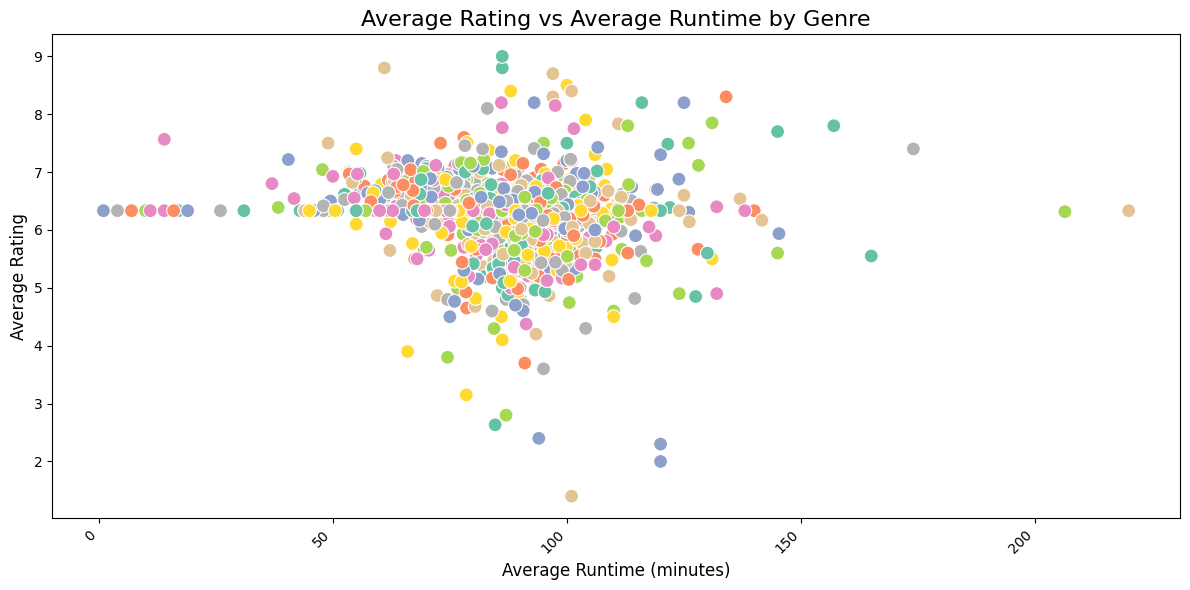

In [39]:
def plot_genre_rating_runtime(genre_stats):
    # Create a scatter plot to show the relationship between average rating and average runtime
    plt.figure(figsize=(12, 6))

    # Scatter plot: average_runtime vs average_rating
    sns.scatterplot(data=genre_stats, x='average_runtime', y='average_rating', hue='genres', palette='Set2', s=100)

    # Customize the plot
    plt.legend().set_visible(False)
    plt.title('Average Rating vs Average Runtime by Genre', fontsize=16)
    plt.xlabel('Average Runtime (minutes)', fontsize=12)
    plt.ylabel('Average Rating', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.show()

plot_genre_rating_runtime(genre_stats)


## Correlation between average rating and average runtime

In [40]:
# Calculate the correlation between average rating and average runtime
correlation = genre_stats['average_rating'].corr(genre_stats['average_runtime'])
print(f"Correlation between average rating and average runtime: {correlation:.2f}")


Correlation between average rating and average runtime: -0.12


C:\Users\Kim\AppData\Local\Temp\ipykernel_10436\1674554932.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=genre_stats, x='average_runtime', y='average_rating', palette='viridis')


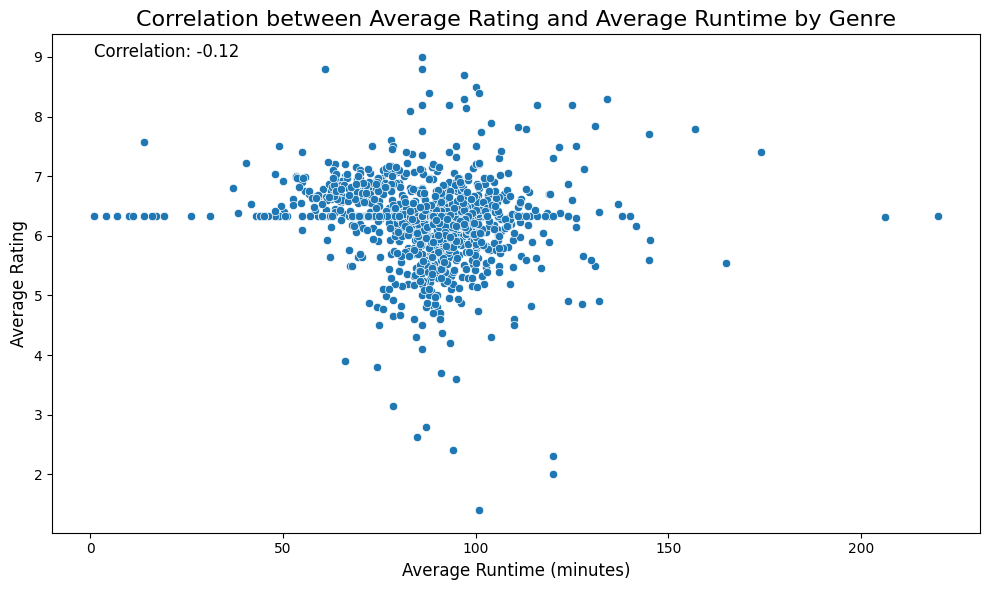

In [41]:
# Visualization: Scatter plot showing the relationship between average rating and average runtime
plt.figure(figsize=(10, 6))

# Scatter plot: average_runtime vs average_rating
sns.scatterplot(data=genre_stats, x='average_runtime', y='average_rating', palette='viridis')

# Add the correlation coefficient as text on the plot
plt.text(x=genre_stats['average_runtime'].min(), 
         y=genre_stats['average_rating'].max(),
         s=f'Correlation: {correlation:.2f}', 
         fontsize=12, color='black')

plt.title('Correlation between Average Rating and Average Runtime by Genre', fontsize=16)
plt.xlabel('Average Runtime (minutes)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()

plt.show()


## Regression Analysis on numvotes and runtime 

In [46]:
# movie_basics and movie_ratings on movie_id
runtime_ratings = pd.read_sql("""
    SELECT mb.*, mr.averageRating, mr.numVotes
    FROM movie_basics AS mb
    JOIN movie_ratings AS mr ON mb.movie_id = mr.movie_id
""", conn)

runtime_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama",7,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama",7,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122,Drama,7,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75,Documentary,6,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98,"Drama,Family",9,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,7,5


In [47]:
top_genre=merged_df[['genres','averagerating','runtime_minutes']].sort_values(by='averagerating', ascending=False).set_index('genres')
top_genre

,averagerating,runtime_minutes
genres,,
"Comedy,Drama",10,129
"Documentary,History",10,70
"Adventure,Comedy",10,77
Documentary,10,93
Documentary,10,52
...,...,...
Horror,1,65
Horror,1,70
Drama,1,121


In [ ]:
import statsmodels.api as sm
import pandas as pd

# making runtime_minutes, numvotes, and averagerating numeric
runtime_ratings['runtime_minutes'] = pd.to_numeric(runtime_ratings['runtime_minutes'], errors='coerce')
runtime_ratings['numvotes'] = pd.to_numeric(runtime_ratings['numvotes'], errors='coerce')
runtime_ratings['averagerating'] = pd.to_numeric(runtime_ratings['averagerating'], errors='coerce')

# Dropping rows with missing values
runtime_ratings_clean = runtime_ratings.dropna(subset=['runtime_minutes', 'numvotes', 'averagerating'])

# Defining independent variables (X) and dependent variable (y)
# independent variables
X = runtime_ratings_clean[['runtime_minutes', 'numvotes']]  

# dependent variable
y = runtime_ratings_clean['averagerating']  

# Fitting the OLS regression model
model = sm.OLS(y, X).fit()

print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:          averagerating   R-squared (uncentered):                   0.172
Model:                            OLS   Adj. R-squared (uncentered):              0.172
Method:                 Least Squares   F-statistic:                              6881.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):                        0.00
Time:                        13:31:16   Log-Likelihood:                     -2.1159e+05
No. Observations:               66236   AIC:                                  4.232e+05
Df Residuals:                   66234   BIC:                                  4.232e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [64]:
# Defining independent variable (y) and dependent variables (X)
y = runtime_ratings_clean['runtime_minutes']  # Dependent variable (what you predict)
X = runtime_ratings_clean[['averagerating', 'numvotes']]  # Independent variables

# Add a constant to the model (add a constant to the model)
X = sm.add_constant(X)  

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        runtime_minutes   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.054
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           0.000864
Time:                        15:09:55   Log-Likelihood:            -4.4770e+05
No. Observations:               66236   AIC:                         8.954e+05
Df Residuals:                   66233   BIC:                         8.954e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           101.1840      3.606     28.063

### Interpretation of the above result;
##### R-squared (0.000): The model explains almost none of the variation in runtime_minutes. This means that averageRating and numvotes are not effective predictors of runtime.
##### P-values: averageRating: p-value = 0.051 (not significant at 𝛼=0.05)
##### This suggests that averageRating does not have a statistically significant impact on runtime_minutes. numvotes: p-value = 0.001 (significant at α=0.05).
##### This means numvotes has a small but statistically significant impact on runtime_minutes.
##### Coefficients: averageRating: Coefficient = −1.0849.
##### For every 1-unit increase in averageRating, runtime_minutes decreases by about 1.08 minutes. However, this result is not statistically significant.
##### numvotes: Coefficient
##### F-statistic (7.054, p = 0.000864)
##### The overall model is statistically significant, but this significance is weak due to the very low R-squared value.

## Test of hypothesis to determine whether runtime and numvotes significantly influence the average rating of movies.
#### H₀: Runtime_minutes or numvotes does not influence the average rating.
#### H₁: Runtime_minutes or numvotes influences the average rating.
#### at significance level 
𝛼 = 0.05

In [53]:
import statsmodels.api as sm
import pandas as pd

# Ensure variables are numeric and drop missing values
runtime_ratings['runtime_minutes'] = pd.to_numeric(runtime_ratings['runtime_minutes'], errors='coerce')
runtime_ratings['numvotes'] = pd.to_numeric(runtime_ratings['numvotes'], errors='coerce')
runtime_ratings['averagerating'] = pd.to_numeric(runtime_ratings['averagerating'], errors='coerce')
runtime_ratings_clean = runtime_ratings.dropna(subset=['runtime_minutes', 'numvotes', 'averagerating'])

# Define independent variables (X) and dependent variable (y)
X = runtime_ratings_clean[['runtime_minutes', 'numvotes']]  # Independent variables
X = sm.add_constant(X)  # Add constant for intercept
y = runtime_ratings_clean['averagerating']  # Dependent variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary to check p-values and other statistics
print(model.summary())

# Hypothesis testing results
p_values = model.pvalues
print("\nHypothesis Testing Results:")
for var, p_val in p_values.items():
    if var == "const":
        continue  # Skip the intercept
    print(f"- {var}: p-value = {p_val:.5f} {'(Significant)' if p_val < 0.05 else '(Not Significant)'}")


                            OLS Regression Results                            
Dep. Variable:          averagerating   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     79.97
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           2.05e-35
Time:                        14:34:54   Log-Likelihood:            -1.1890e+05
No. Observations:               66236   AIC:                         2.378e+05
Df Residuals:                   66233   BIC:                         2.378e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.3182      0.006   10


##### After hypothesis testing on the regression model with average_Rating as the dependent variable and runtime_minutes and numvotes as independent variables:
##### runtime_minutes: The p-value is greater than 0.05, so we fail to reject the null hypothesis, meaning runtime does not significantly affect movie ratings.
##### numvotes: The p-value is less than 0.05, so we reject the null hypothesis, meaning numvotes significantly impacts movie ratings.

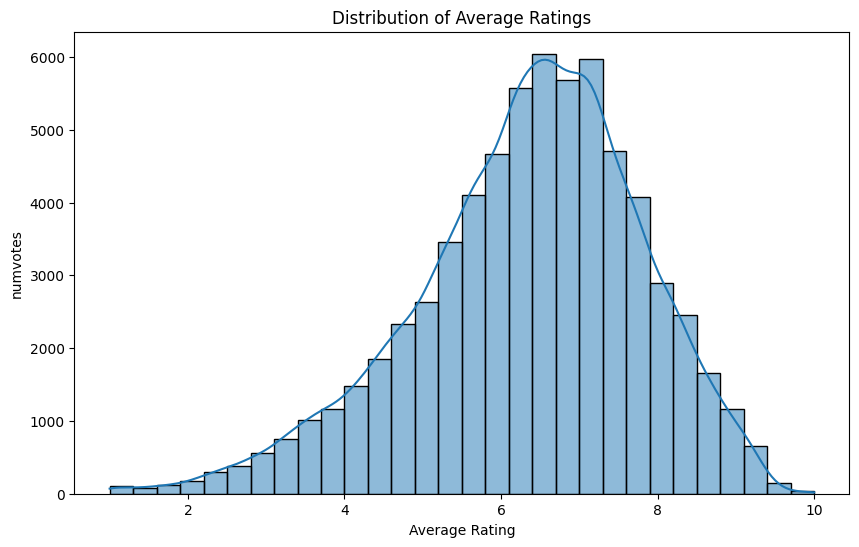

In [63]:
# Distribution plot of Average Ratings
plt.figure(figsize=(10, 6))
sns.histplot(runtime_ratings_clean['averagerating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('numvotes')
plt.show()


In [62]:
import statsmodels.api as sm

# Ensure variables are numeric and drop missing values
runtime_ratings['runtime_minutes'] = pd.to_numeric(runtime_ratings['runtime_minutes'], errors='coerce')
runtime_ratings['numvotes'] = pd.to_numeric(runtime_ratings['numvotes'], errors='coerce')
runtime_ratings['averagerating'] = pd.to_numeric(runtime_ratings['averagerating'], errors='coerce')
runtime_ratings_clean = runtime_ratings.dropna(subset=['runtime_minutes', 'numvotes', 'averagerating'])

# Define independent variables (X) and dependent variable (y)
X = runtime_ratings_clean[['averagerating', 'numvotes']]  # Independent variables
X = sm.add_constant(X)  # Add constant for intercept
y = runtime_ratings_clean['runtime_minutes']  # Dependent variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary to check p-values and other statistics
print(model.summary())

# Hypothesis testing results
p_values = model.pvalues
print("\nHypothesis Testing Results:")
for var, p_val in p_values.items():
    if var == "const":
        continue  # Skip the intercept
    print(f"- {var}: p-value = {p_val:.5f} {'(Significant)' if p_val < 0.05 else '(Not Significant)'}")


                            OLS Regression Results                            
Dep. Variable:        runtime_minutes   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     7.054
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           0.000864
Time:                        15:00:40   Log-Likelihood:            -4.4770e+05
No. Observations:               66236   AIC:                         8.954e+05
Df Residuals:                   66233   BIC:                         8.954e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           101.1840      3.606     28.063

##### runtime_minutes: The p-value is greater than 0.05, so we fail to reject the null hypothesis, meaning runtime_minutes does not significantly affect the number of votes a movie receives.
##### averageRating: The p-value is less than 0.05, so we reject the null hypothesis, meaning averageRating significantly influences the number of votes a movie receives.